Tidal Project

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import tensorflow as tf
from scipy.optimize import curve_fit

In [3]:
fname = 'ASTR19_S22_group_project_data.txt'
#open the file with read mode
f = open(fname,'r')

#print the name of the file
print(f.name)
#read the data as a string
test_data = f.read()
#print the info from the file
#print(test_data)

ASTR19_S22_group_project_data.txt


# Curve Fitting

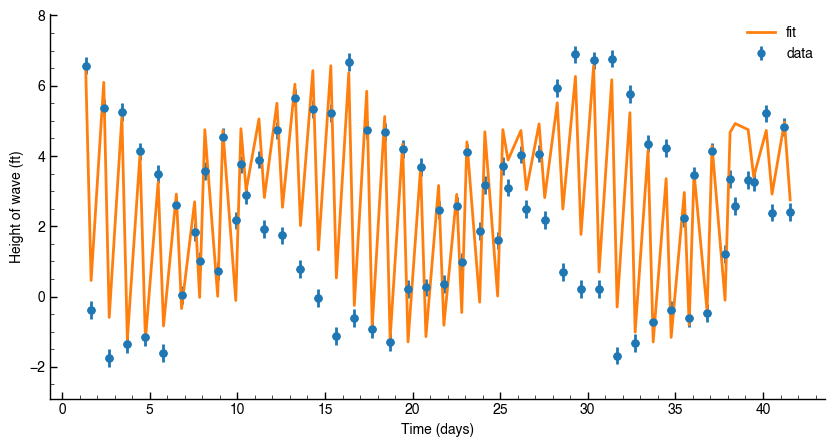

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

#define the filename
fname = 'ASTR19_S22_group_project_data.txt'

#open the file with numpy loadtxt
test_data = np.loadtxt(fname, dtype={'names': ('day', 'time', 'height'),'formats': ('i4', 'S5', 'f4')})

#print the info from the file
#print(test_data)

plt.style.use("astr19_matplotlib_defaults.txt")
fig = plt.figure(figsize=(10,5))
ax = plt.subplot
plt.xlabel('Time (days)')
plt.ylabel('Height of wave (ft)')


result_x = []
result_y = []
for item in test_data:
    day = item [0]
    time = item [1].decode()
    height = item [2]
    Day = (day)
    TimeParts = time.split(":")
    daysfromhour = int(TimeParts[0])/24
    daysfromminutes = int(TimeParts[1])/60/24
    timeindays = day + daysfromhour + daysfromminutes
    #print ("("+ str(totalMinutes) +"," + str(height)+")")
    x = timeindays
    y = height
    result_x.append(x)
    result_y.append(y)
    #plt.scatter(x,y)

result_x = np.asarray(result_x)
result_y = np.asarray(result_y)
#print(result_x)
#print(result_y)

#curve fitting???

y_err=0.25
#define the function to fit
def f_line(x, a, b, c,d,e,f):
    return (a * np.sin(((2*np.pi)/1)*x + b+6)) + (1*c * np.sin(((2*np.pi)/0.2)*x + d+6)) * (e * np.sin(((2*np.pi)/0.5)*x + f))
    #function should be something like sinx+(sinx)(sinx) with transformations
    #(a * np.sin(b*x + c) + d) + (e * np.sin(f*x + g) + h) * (i * np.sin(j*x + k) + l) maybe


#perform the fit
#p0 uses random numbers
params, params_cov = optimize.curve_fit(f_line, result_x, result_y, p0=[3, 0.5, 1, 1, 1, 1,]) 
#1, 1, 1, 1, 1,1])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]
e_fit = params[4]
f_fit = params[5]
#g_fit = params[6]
#h_fit = params[7]
#i_fit = params[8]
#j_fit = params[9]
#k_fit = params[10]
#l_fit = params[11]




#print(f'params {a_fit}, {b_fit}, {c_fit}, {d_fit}')

y_fit = (a_fit * np.sin(((np.pi)/0.5)*result_x + b_fit)+2) + (c_fit * np.cos(((2*np.pi)/0.5)*result_x + d_fit)) * (e_fit * np.sin(((2*np.pi)/0.5)*result_x + f_fit))
#print(y_fit)

#plot the fit on the same graph
plt.scatter(result_x, result_y)
plt.errorbar(result_x, result_y, yerr= 0.25, fmt='o', label='data')
plt.plot(result_x, y_fit, label='fit')
plt.legend(loc=0, frameon=False)
plt.show()     #delete later


#plt.savefig('project-figure.pdf', bbox_inches='tight', dpi=600)

# Plotting Residuals?? (step 3)

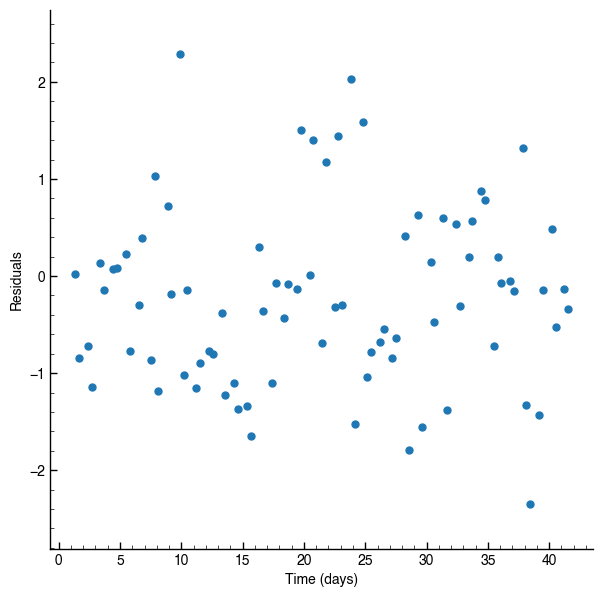

In [81]:
y_fit = (a_fit * np.sin(((np.pi)/0.5)*result_x + b_fit)+2) + (c_fit * np.cos(((2*np.pi)/0.5)*result_x + d_fit)) * (e_fit * np.sin(((2*np.pi)/0.5)*result_x + f_fit))

residuals = result_y - y_fit

plt.figure(figsize=(7,7))
plt.scatter(result_x, residuals)
plt.xlabel('Time (days)')
plt.ylabel('Residuals')
plt.show()

In [82]:
#Standard Deviation
residuals_std = np.std(residuals)

print(f'Standard Deviation of Residuals: {residuals_std:.4f}')

Standard Deviation of Residuals: 0.9063


# fitting curve using tensor flow

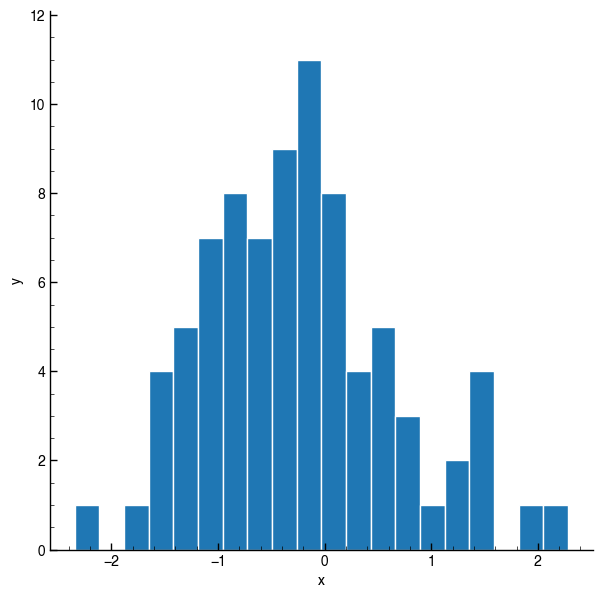

In [83]:
plt.figure(figsize=(7, 7))
plt.hist(residuals, bins=20, edgecolor='white')
plt.xlabel('x')
plt.ylabel('y')
plt.show()